In [47]:
#FILE NAME: Lab_1
#PROGRAMMER: VG6
#DATE: 14.03.2020
#Purpose: To learn brights convertion

# importing modules
import numpy as np
from skimage.io import imread, imsave, imshow
from skimage import img_as_float, img_as_ubyte

# Decreasing brights resolutiong function
# Arguments:
#   - Colored image and wanted bits for color 
#     at resulted image
#       img : np.array, bits_for_color : int
# Returns:
#   - Grayscale reduced brights image
#       img
def decrease_brights_resolution(img : np.array , bits_for_color : int) -> np.array:
    # converting image colors to 0...1
    img = img_as_float(img)
    
    # converting image to grayscale
    img = img[:, :, 0] * 0.2126 + img[:, :, 1] * 0.7152 + img[:, :, 2] * 0.0722
    
    # conveting image color back to 0..255
    img = img_as_ubyte(img)
    
    # finding amount of levels image will take
    # after brights convertion
    levels = 2 ** 8 / 2 ** bits_for_color
    
    # going through all image pixels and changing
    # to median value of range
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # getting range 
            r = img[i, j] // levels
            
            # getting lower bound
            lower = r * levels - 1
            
            # getting upper bound
            upper = lower + levels
            
            # getting value of level
            value = lower + levels / 2
     
            # assigning value to image pixel
            img[i, j] = value
    
    return img

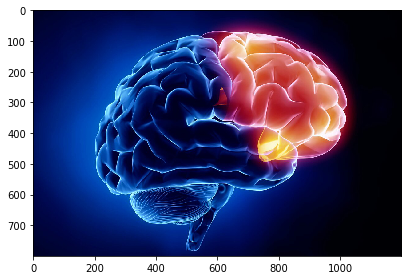

In [50]:
%matplotlib inline

# reading image to img variable
img = imread('https://avatars.mds.yandex.net/get-pdb/1686358/74613a5a-ec92-46a0-a8d1-976116f8065d/s1200')

# shoing image
imshow(img)

In [60]:
# decreasing brights resoluting of image
new_img = decrease_brights_resolution(img, 2)

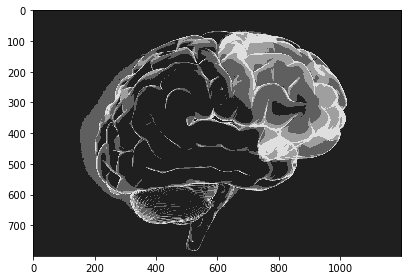

In [61]:
# showing converted image
imshow(new_img)

In [65]:
# showing unique brights of the picture
np.unique(new_img)

array([ 31,  95, 159, 223], dtype=uint8)

In [66]:
# decreasing brights resoluting of image
image_4_bits = decrease_brights_resolution(img, 4)

Z:\anaconda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


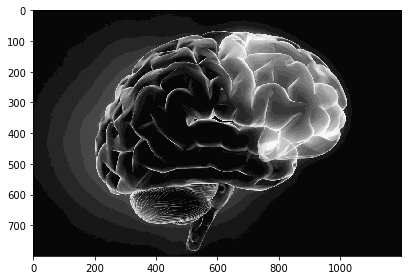

In [67]:
# showing convetring image
imshow(image_4_bits)

In [68]:
# showing unique brights for converted image
np.unique(image_4_bits)

array([  7,  23,  39,  55,  71,  87, 103, 119, 135, 151, 167, 183, 199,
       215, 231, 247], dtype=uint8)

In [69]:
# showing amoung of unique brights
len(np.unique(image_4_bits))

16